In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advanced-dls-spring-2021/submission.csv
/kaggle/input/advanced-dls-spring-2021/train.csv
/kaggle/input/advanced-dls-spring-2021/test.csv


<font size=5>**Load Data**</font>

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/train.csv')
train_df.head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [4]:
train_df.shape

(5282, 20)

In [5]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

1048 1707 4002

In [6]:
train_df[train_df['TotalSpent']==' ']['TotalSpent']

1048     
1707     
2543     
3078     
3697     
4002     
4326     
4551     
4598     
Name: TotalSpent, dtype: object

In [7]:
train_df.loc[train_df[train_df['TotalSpent']==' ']['TotalSpent'].index, 'TotalSpent'] = 0

In [8]:
train_df[train_df['TotalSpent']==0]['TotalSpent']

1048    0
1707    0
2543    0
3078    0
3697    0
4002    0
4326    0
4551    0
4598    0
Name: TotalSpent, dtype: object

In [9]:
train_df['TotalSpent'] = train_df['TotalSpent'].astype('float64')

In [10]:
train_df[cat_cols] = train_df[cat_cols].astype('object')

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   object 
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   object 
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [13]:
train_df.describe()

,ClientPeriod,MonthlySpending,TotalSpent,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2287.486161,0.262022
std,24.550326,30.176464,2269.049195,0.439776
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.462500,395.725000,0.000000
50%,29.000000,70.400000,1405.650000,0.000000
75%,55.000000,90.050000,3795.212500,1.000000
max,72.000000,118.750000,8684.800000,1.000000


<font size=5>**Data analysis**</font>

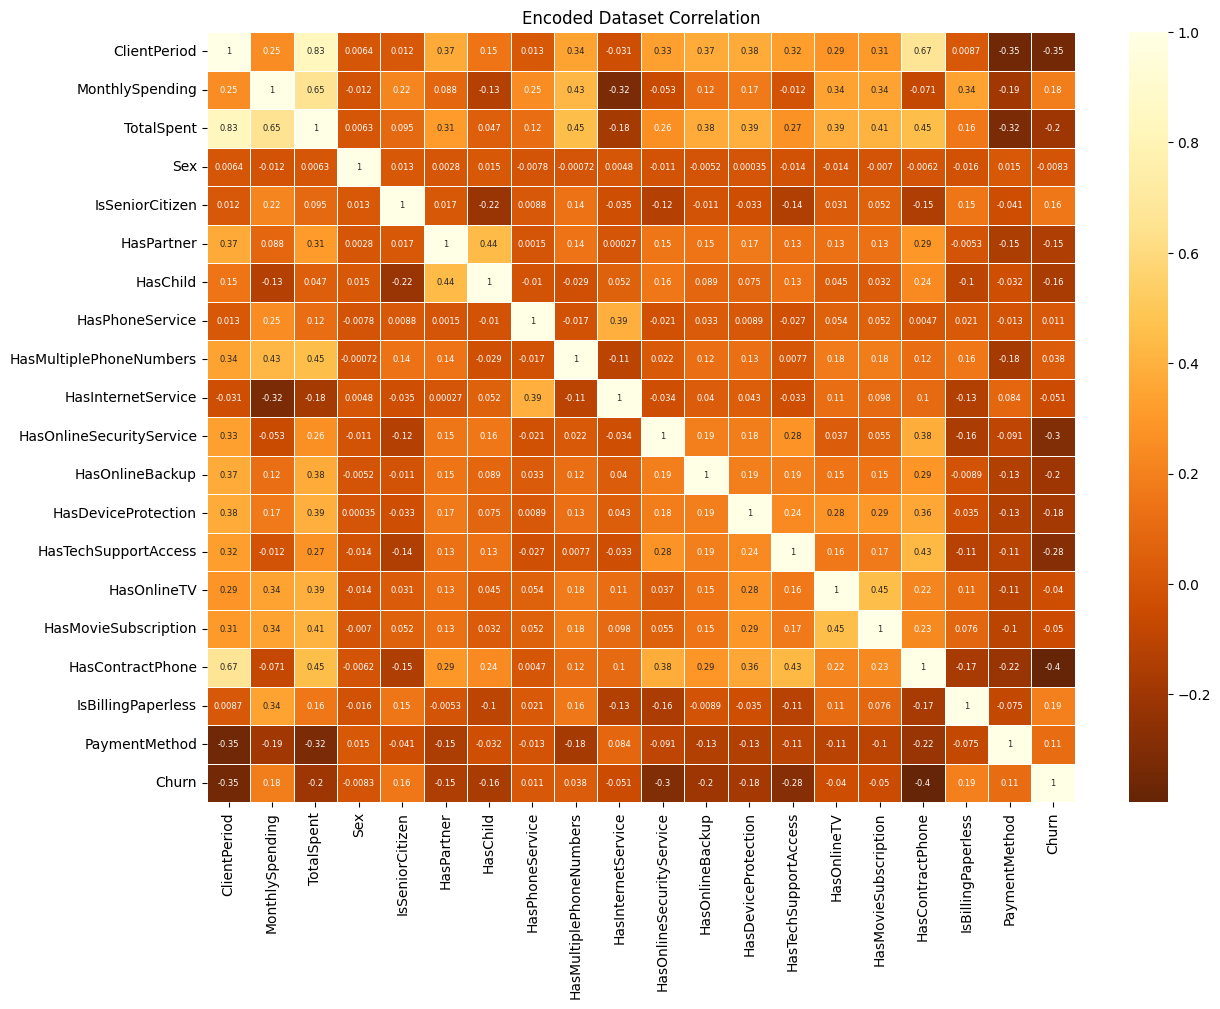

In [14]:
from sklearn.preprocessing import LabelEncoder

df_encoded = train_df.copy()

# Label encode categorical columns
label_encoders = {}
for column in cat_cols:
    if column!='IsSeniorCitizen':
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column])
        label_encoders[column] = le


def plot_correlation_heatmap(df: pd.core.frame.DataFrame, title_name: str = 'Train correlation') -> None:
    excluded_columns = []
    columns_without_excluded = [col for col in df.columns if col not in excluded_columns]
    corr = df[columns_without_excluded].corr()
    
    fig, axes = plt.subplots(figsize=(14, 10))
    sns.heatmap(corr, linewidths=.5, cmap='YlOrBr_r', annot=True, annot_kws={"size": 6})
    plt.title(title_name)
    plt.show()
plot_correlation_heatmap(df_encoded, 'Encoded Dataset Correlation')

<Figure size 2000x2000 with 0 Axes>

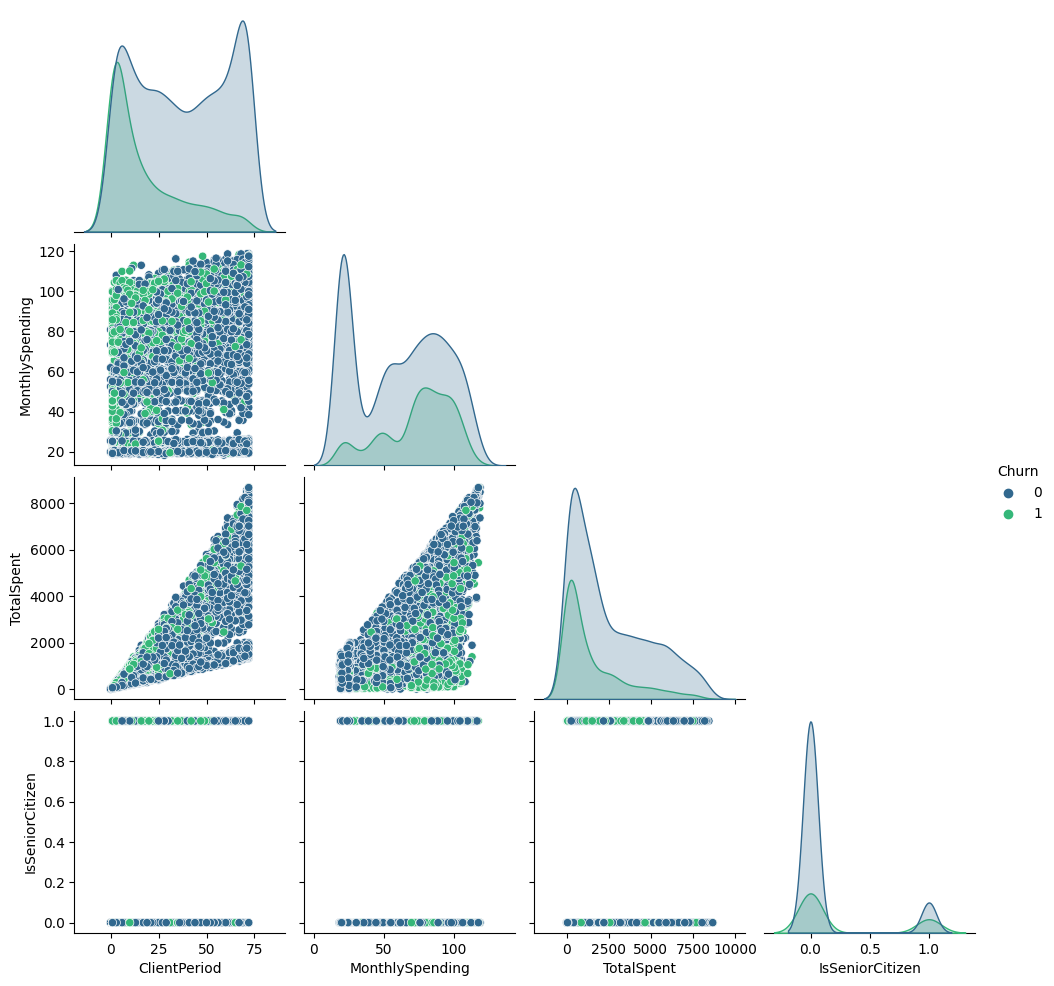

In [15]:
plt.figure(figsize=(20, 20))
sns.pairplot(data=train_df,hue='Churn', corner=True, palette="viridis")
plt.grid(None)
plt.show()

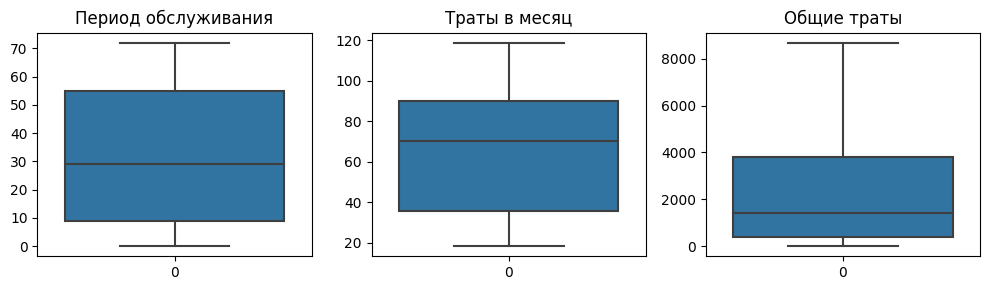

In [16]:
fig, axs = plt.subplots(ncols=3, figsize=(10, 3))
sns.boxplot(data=train_df.ClientPeriod, ax=axs[0]).set_title('Период обслуживания');
sns.boxplot(data=train_df.MonthlySpending, ax=axs[1]).set_title('Траты в месяц');
sns.boxplot(data=train_df.TotalSpent, ax=axs[2]).set_title('Общие траты');
fig.tight_layout()

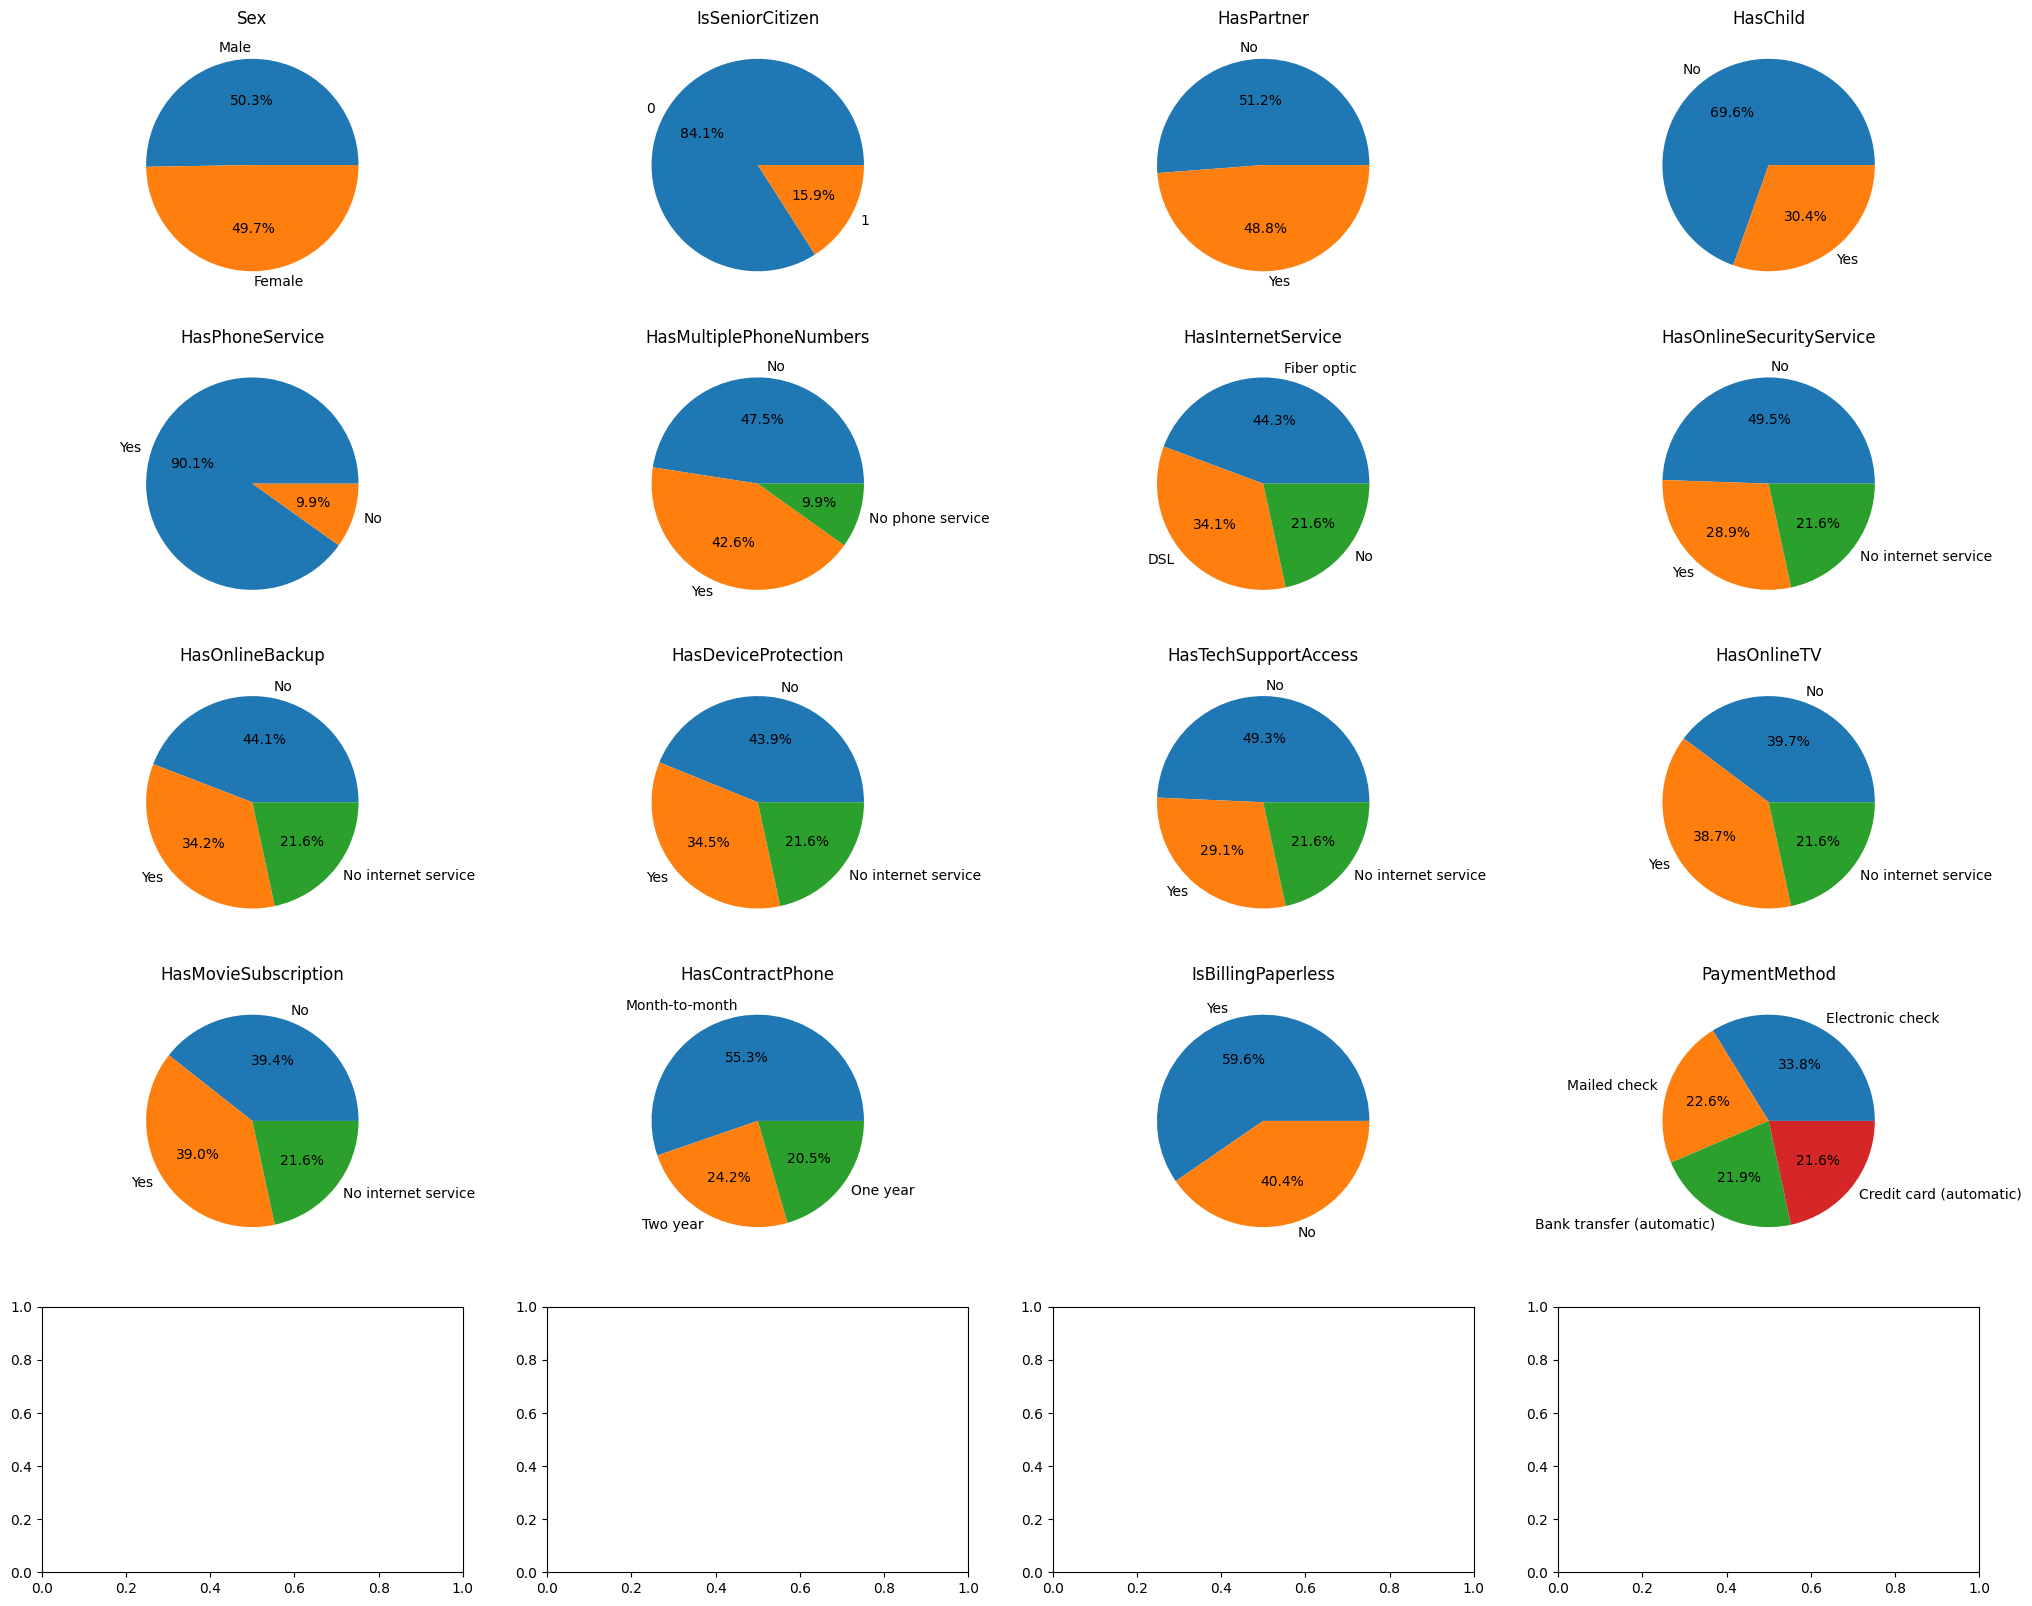

In [17]:
fig, axes = plt.subplots(5, 4, figsize=(25, 20))
for ax, col in zip(axes.flatten(), cat_cols):
    ax.set_title(col)
    ax.pie(train_df[col].value_counts(), autopct="%1.1f%%", labels=train_df[col].value_counts().index)

<font size=5>**Linear models**</font>

In [18]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

In [19]:
from sklearn.metrics import roc_auc_score

In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(train_df[feature_cols], train_df[target_col],
 test_size=0.25, random_state=50)

In [21]:
preprocessor = ColumnTransformer(
    [
        ('num', StandardScaler(), num_cols),
        (
            'cat',
            OneHotEncoder(handle_unknown='ignore'),
            cat_cols
        )
    ],
    verbose_feature_names_out = True,
)

In [22]:
lr = Pipeline(steps=[
    ('enc', preprocessor),
    ('alg', LogisticRegression(n_jobs=-1, solver= 'saga'))
])

In [23]:
lr_cv = Pipeline(steps=[
    ('enc', preprocessor),
    ('alg', LogisticRegressionCV(cv=5,Cs=17, n_jobs=-1, solver= 'saga'))
])

In [24]:
parameters_lr = {
    'alg__C': np.arange(1,20.25,0.5)
}

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
train_df

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [27]:
grid = GridSearchCV(lr, parameters_lr, scoring='roc_auc')
grid.fit(X_train, y_train)
grid.best_params_

{'alg__C': 13.0}

In [28]:
roc_auc_score(y_valid, grid.best_estimator_.predict_proba(X_valid)[:,1])

0.8483855009893865

In [29]:
lr_cv.fit(X_train, y_train)
roc_auc_score(y_valid, lr_cv.predict_proba(X_valid)[:,1])

0.8490510883252382

<font size=5>**Playing with CatBoost**</font>

In [30]:
from catboost import CatBoostClassifier, Pool

In [31]:
train_dataset = Pool(X_train, y_train, cat_cols)
val_dataset = Pool(X_valid, y_valid, cat_cols)

In [32]:
model = CatBoostClassifier(eval_metric='AUC:hints=skip_train~false', logging_level='Silent')
model.fit(train_dataset, use_best_model=True, eval_set=val_dataset)

In [33]:
roc_auc_score(y_valid, model.predict_proba(val_dataset)[:, 1])

0.85541014570966

In [34]:
boosting_params = {
    'iterations': np.arange(100,1001,50),
    'l2_leaf_reg': np.arange(1,10),
    'depth' : np.arange(1,11),
    'learning_rate': np.arange(0.01,0.1,0.01)
}

In [35]:
model_rand = CatBoostClassifier(eval_metric='AUC:hints=skip_train~false',
                                logging_level='Silent',
                                early_stopping_rounds=100)
search = model_rand.randomized_search(boosting_params, train_dataset, cv=5, plot=True, verbose=False)
search['params']

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'depth': 1,
 'l2_leaf_reg': 9,
 'iterations': 600,
 'learning_rate': 0.060000000000000005}

In [36]:
roc_auc_score(y_valid, model_rand.predict_proba(val_dataset)[:, 1])

0.8555360676380643

In [37]:
test_df = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/test.csv')
predictions = model_rand.predict_proba(test_df)[:, 1]

In [38]:
submission = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/submission.csv')
submission['Churn'] = predictions
submission.to_csv('submission.csv', index=False)

In [39]:
predictions_default = model.predict_proba(test_df)[:, 1]

In [40]:
submission_default = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/submission.csv')
submission_default['Churn'] = predictions_default
submission_default.to_csv('submission_default.csv', index=False)